### IBM Explainability Hackathon

<font color='Red'>**Project Title:**</font> Detecting COVID19 Underlying Conditions: Diabetes Case Study<br>
<font color='Red'>**Author:**</font> Lawrence Krukrubo<br>
<font color='Red'>**Date:**</font> 30th April 2020<br>

### Background:

The Novel-Corona-Virus-Infectious-Disease-2019 (COVID19) which originated in Wuhan, China in Dec 2019, has spread to over 185 countries around the world and infected over 2.6 million people, with over 185,000 deaths.
<br>See this [link](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) from the _COVID19 dashboard, by the Center for Systems, Science and Engineering at Johns Hopkins University._

### **Common symptoms of COVID19**

Patients of all ages are being infected by COVID19, whose most common symptoms include:
>>Coughing<br>
Fatigue<br>
Muscle Pain<br>
Chest Pain<br>
Difficulty Breathing<br>
Pneumonia<br>
Loss of Smell<br>
Loss of Taste

Patients range in age from toddlers of few months of age to the elderly, with oldest reported case of about 106 years old.
<br>
<br>
<br>
### **Underlying Conditions that exacerbate COVID19**
<br>Researchers from the Center for Disease Control have identified certain underlying conditions in patients that aggravate the effects of COVID19 on patients, leading to severe illness or death. These underlying conditions include:-

1. People over the age of 65 years are more likely to develop severe illnesses or death.
2. People with chronic lung disease or moderate or severe asthma.
3. People who are immuno-compromised, These include:-<br>
>>cancer treatments,<br>
Smoking,<br>
Bone marrow or organ transplantation<br>
Immune deficiencies<br>
Poorly controlled HIV/AIDS<br>

4. Severe obesity<br>
5. Prolonged use of corticosteroids<br>
6. Diabetes<br>
7. Chronic kidney disease<br>
8. Liver disease<br>

see [link](https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/people-at-higher-risk.html) from the center for disease control.


### Project Goal:

The WHO has stated that up to 40% of COVID19 carriers may be asymptomatic. This is one major reason why the spread of the virus has been unprecedented and unrivalled in history. See [link](https://www.cdc.gov/coronavirus/2019-ncov/hcp/guidance-risk-assesment-hcp.html)
<br>Some infected people may not display compelling symptoms, yet such people are as infectious as those severely sick.
<br>Therefore the objective of this project is to assist medical practitioners to quickly diagnose underlying conditions in patients who may be Diabetic. This will help to quickly inform those with emerging to acute levels of Diabetes to first be aware, and secondly take immediate remedies to tackle their Diabetes on time, just incase they eventually contract the  Corona virus.<br>Early detection of underlying conditions of COVID19 will help reduce fatality rates as more people get treated for pre-conditions before exposure to COVID19.

## Data:

<h4>Data Dictionary:</h4>

[Kaggle-Link](https://www.kaggle.com/uciml/pima-indians-diabetes-database)<br>

**Context:**<br>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content:**<br>
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Acknowledgements:**<br>
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

**Columns:**<br>
>>_Pregnancies_:<br>Number of times pregnant<br>
_GlucosePlasma_:<br>glucose concentration a 2 hours in an oral glucose tolerance test<br>
_BloodPressureDiastolic_:<br>blood pressure (mm Hg)<br>
_SkinThicknessTriceps_: skin fold thickness (mm)<br>
_SerumInsulin_:<br>2-Hour serum insulin (mu U/ml)<br>
_BMIBody_:<br>Body mass index (weight in kg/(height in m)^2)<br>
_DiabetesPedigreeFunction_:<br>Diabetes pedigree function<br>
_Age_:<br>Age (years)<br>
_OutcomeClass_:<br>Variable (0 or 1), 0 representing Non-diabetic and 1 Diabetic.

### **Exploratory Data Analysis:**

In [2]:
# Let's import some modules

try:
    import lale
except:
    ! pip install lale
    import lale
try:
    import aix360
except:
    ! pip install aix360
    import aix360
print('all modules imported!')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


all modules imported!


In [3]:
# Let's import some needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next, let's download both patients and doctors data sets from Github

In [4]:
! rm diabetes.csv  # If any file bearing this name exists, then delete first
! wget https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/diabetes.csv # Download file
! rm doctors.csv # If any file bearing this name exists, then delete first
! wget https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/doctors.csv  # Download file

--2020-04-30 19:17:19--  https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791416 (773K) [text/plain]
Saving to: ‘diabetes.csv’

100%[======================================>] 791,416     --.-K/s   in 0.03s   

2020-04-30 19:17:19 (27.3 MB/s) - ‘diabetes.csv’ saved [791416/791416]

--2020-04-30 19:17:22--  https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/doctors.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 355601 (347K) [text/plain]
Saving to: ‘doctors.csv’

100%[======================================>] 355,6

Let's explore the doctors data set

In [5]:
doc_df = pd.read_csv('doctors.csv', encoding='latin-1')
doc_df.head()

PatientID           Physician
0    1000038  Jeanne Vestergaard
1    1000069     Sheldon Comeaux
2    1000118       Brain Dulaney
3    1000183      Alaine Poisson
4    1000326        Erik Collado

Let's see the shape and summary statistics

In [6]:
doc_df.shape

(14895, 2)

In [7]:
# Let'see the summary statistic for numerical column 
doc_df.describe().T

count          mean            std        min        25%  \
PatientID  14895.0  1.502830e+06  289327.807906  1000038.0  1252722.5   

                 50%        75%        max  
PatientID  1505487.0  1755282.5  1999997.0

In [8]:
# Let's see summary statistic of categorical column
doc_df.describe(include='object').T

count unique               top freq
Physician  14895    109  Anthony Frizzell  156

**The summary statistics of the Doctor's data frame tell us the following:**
1. There's only one numerical column - PatientID, which has observations for 14895 patients. Each ID is an identifier for each patient that doctors treat.
2. The Physician column has 14895 entries too. But unique entries are only 109. This means even though we have patients IDs of 14895 patients, these patients are treated or administered by only 109 doctors.
3. The doctors that have the highest number of patients are Dr. Dan Drayton and Dr. Anthony Frizzel with 156 patients each.

In [9]:
x = pd.DataFrame(doc_df.groupby(['Physician']).size())
x.columns = ['Count']
x = x.sort_values('Count', ascending=False).head(10)
x

Count
Physician                
Dan Drayton           156
Anthony Frizzell      156
Gordon Fredrickson    155
Zachary Fellows       155
Chad Corbitt          154
Neandro Baeza         137
Dwayne Passmore       137
Janna Gamble          137
Daisuke Nakayama      137
Daitaro Ishida        137

From the code above, we can see the number of patients each doctor treated. It's showing the 10 doctors with highest count of patients and just as we saw in the summary above, Drs. Dan Drayton and Anthony Frizzell have the highest number of patients.

Let's explore the Patients Diabetes data frame

In [10]:
patients_df = pd.read_csv('diabetes.csv')
patients_df.head()

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0

In [11]:
# Let's see the shape
patients_df.shape

(15000, 10)

The Patients data frame has 15000 observations, we remember that the doctors data frame had 14895 observations. There's some difference. let's try to find out wht

In [12]:
patients_df.PatientID.nunique()

14895

With the above code we checked for the number of unique patients ID in the patients data frame. And consequently, we have the same 14895 unique observations as the doctors data frame.This possibly means there are some patient IDs with multiple entries in the data set. Let's investigate that.<br> first let's see if there are Patient IDs in the patients data frame not in the doctors data frame.

In [13]:
set(patients_df.PatientID).difference(set(doc_df.PatientID))

set()

The empty set above indicates that the PatientID columns of both data sets have identical elements.<br>So this means the 15000 observations in the patients_df include duplicated entries for some patients. 


<h4>Merging both data frames</h4>
Since we've established that both patients and doctors data frames have the same PatientID index. Let's merge them both on PatientID 

In [14]:
diabetes_df = patients_df.merge(doc_df, how= 'inner', on= 'PatientID')
print(f'The shape of diabetes_df is {diabetes_df.shape}')
diabetes_df.head()

The shape of diabetes_df is (15000, 11)


PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  \
0                34            23  43.509726          1.213191   21         0   
1                47            36  21.240576          0.158365   23         0   
2                52            35  41.511523          0.079019   23         0   
3                25           304  29.582192          1.282870   43         1   
4                27            35  42.604536          0.549542   22         0   

            Physician  
0         Dan Drayton  
1    Anthony Frizzell  
2  Gordon Fredrickson  
3        Chad Corbitt  
4     Zachary Fellows

Let's slice out the patients who have more than one entry in the diabetes_df data frame

In [15]:
duplicate_patients = [x for x in diabetes_df.PatientID if list(diabetes_df.PatientID).count(x) > 1]

# Now let's ensure no PatientID appears twice in our list
duplicate_patients = list(set(duplicate_patients))

Let's see how many patients have duplicate records in the data set

In [16]:
len(duplicate_patients)

105

Now let's see the records of only these 105 Patients that have multiple records in the data set

In [17]:
# First let's make a copy of the diabetes _df
copy = diabetes_df.copy(deep=True)

# Next let's make the PatientID column the index so we can sort with it
copy.index = copy.PatientID

# So let's drop the PatientID column, since it's also the index.
copy.drop(['PatientID'], axis=1, inplace=True)

# Let's see the first five rows
copy.head()

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
PatientID                                                       
1354778              0            171                      80   
1147438              8             92                      93   
1640031              7            115                      47   
1883350              9            103                      78   
1424119              1             85                      59   

           TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
PatientID                                                                     
1354778                  34            23  43.509726          1.213191   21   
1147438                  47            36  21.240576          0.158365   23   
1640031                  52            35  41.511523          0.079019   23   
1883350                  25           304  29.582192          1.282870   43   
1424119                  27            35  42.604536          0.549542   22   

           Diabetic           Physician  
PatientID                                
1354778           0         Dan Drayton  
1147438           0    Anthony Frizzell  
1640031           0  Gordon Fredrickson  
1883350           1        Chad Corbitt  
1424119           0     Zachary Fellows

Finally let's select only those index that are in our duplicated patients list

In [18]:
duplicate_df = copy.loc[duplicate_patients]

# Let's see the first 20 entries
duplicate_df.iloc[:20]

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
PatientID                                                       
1399297              1             92                      52   
1399297              1             68                      41   
1940995              0             73                      95   
1940995              2            105                      99   
1623043              1             83                      92   
1623043              6            105                      47   
1772038              5            144                      72   
1772038              4            138                      60   
1104393              0            158                      87   
1104393              7            144                      97   
1867795             11            122                      86   
1867795              0             80                      57   
1382420              0            115                      56   
1382420              4             96                      54   
1998870              0             95                      88   
1998870              8            118                      72   
1653789              0             81                      50   
1653789              2            118                      86   
1612832              6             90                      64   
1612832              2            138                      63   

           TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
PatientID                                                                     
1399297                  17           298  21.578214          0.722903   35   
1399297                  16            38  40.545227          0.203020   24   
1940995                  31            82  21.032093          0.094041   23   
1940995                  40            65  31.879179          0.194376   21   
1623043                  11           160  21.637582          0.154840   22   
1623043                  35            38  25.735653          0.189689   23   
1772038                  50            65  31.657260          0.082558   46   
1772038                  28            96  38.800058          0.730051   52   
1104393                   9            25  19.531718          0.118134   23   
1104393                  20           168  42.210645          1.046933   49   
1867795                  51           287  34.052230          0.097248   29   
1867795                  15            26  50.876221          0.593496   22   
1382420                  10           181  51.326693          0.149021   25   
1382420                  49            55  22.031759          0.537598   21   
1998870                  17           166  24.224505          0.146521   26   
1998870                  39            68  25.226202          0.574688   22   
1653789                   8           211  26.049610          0.122352   23   
1653789                  27            41  36.872411          0.260180   21   
1612832                  10            25  42.597435          0.161129   23   
1612832                   8           213  32.795403          0.979141   54   

           Diabetic           Physician  
PatientID                                
1399297           0      Vaughn Oquendo  
1399297           0      Vaughn Oquendo  
1940995           0      Germain Arenas  
1940995           1      Germain Arenas  
1623043           0         Dan Drayton  
1623043           1         Dan Drayton  
1772038           1      Alaine Poisson  
1772038           1      Alaine Poisson  
1104393           0      Vinicio Robles  
1104393           0      Vinicio Robles  
1867795           1     Dwayne Passmore  
1867795           0     Dwayne Passmore  
1382420           0    Lonnie Schindler  
1382420           0    Lonnie Schindler  
1998870           0  Margret Villarreal  
1998870           1  Margret Villarreal  
1653789           0      Aaliyah Briggs  
1653789           1      Aaliyah Briggs  
1

We can see the details of patients with more than one entry above. The table above shows the first 20 entries for patients who got tested more than once.<br>It is clear that some patients were asymptomatic at some point and became symptomatic for diabetes later. While some had consistent conditions either symptomatic or asymptomatic.
<br>We shall use these patients data to train a model that would learn how to predict if a patient is asymptomatic for diabetes or not and to what extent in a fair and explainable manner.

In [19]:
diabetes_df.head()

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  \
0                34            23  43.509726          1.213191   21         0   
1                47            36  21.240576          0.158365   23         0   
2                52            35  41.511523          0.079019   23         0   
3                25           304  29.582192          1.282870   43         1   
4                27            35  42.604536          0.549542   22         0   

            Physician  
0         Dan Drayton  
1    Anthony Frizzell  
2  Gordon Fredrickson  
3        Chad Corbitt  
4     Zachary Fellows

### **Feature-Engineering:**

Let's see the distribution of each variable in our data set

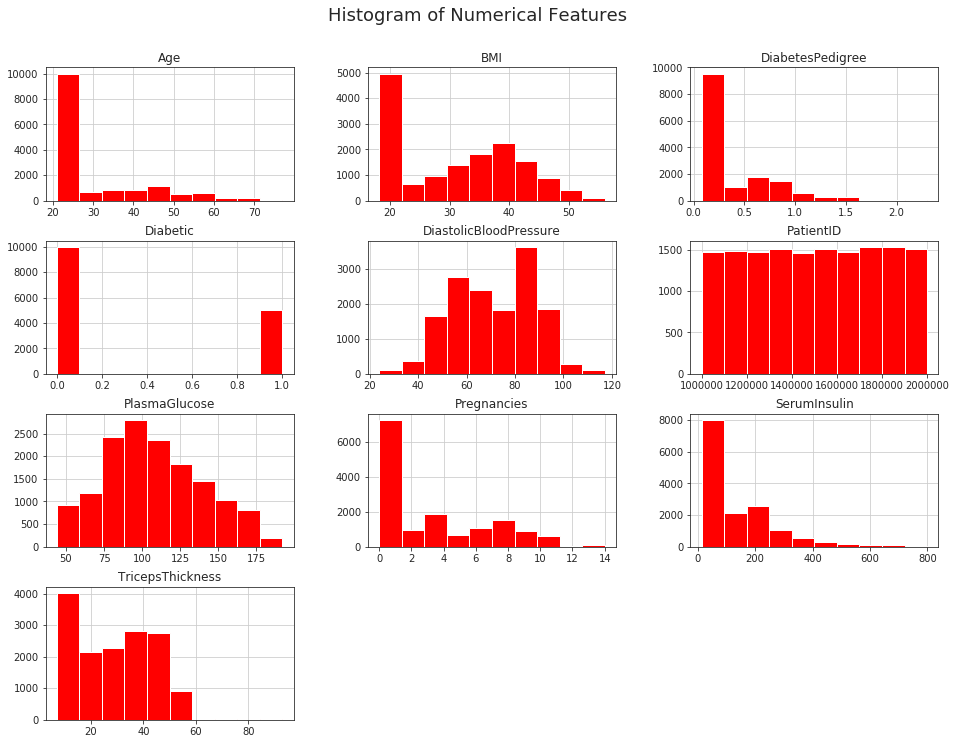

In [20]:
sns.set_style('ticks')
diabetes_df.hist(figsize=(16,12), color='red')
plt.suptitle('Histogram of Numerical Features', fontsize=18, y=0.95)
plt.show()

Most of the features are Unimodal around the first quartile. This means they tend to have a high frequency of low values. Take for eaxmple features like `TricepsThickness`, `SerumInsulin`, `Pregnancies`, `Age`, `BMI` and `DiabetesPedugree`. All these features have a high concentration of low values around the first quartile and progressively fewer high values.This shows that generally our data set has a distribution of more frequent low values .

We can also see that features like Age, DiabetesPedigree, SerumInsulin seem to be skewed to the right.
This is due to a lot of smaller values present and a progressive distribution of fewer large values.

Let's make the distribution better by using the log of the values, rather than actual values in these features.
This is a part of the feature-engineering process in Machine Learning

In [21]:
for i in diabetes_df.columns:
    if i in ['Age', 'DiabetesPedigree','SerumInsulin']:
        diabetes_df[i] = diabetes_df[i].apply(np.log)
        print(i)

SerumInsulin
DiabetesPedigree
Age


Now that we've applied the log function to a few variables, let's see the distribution again

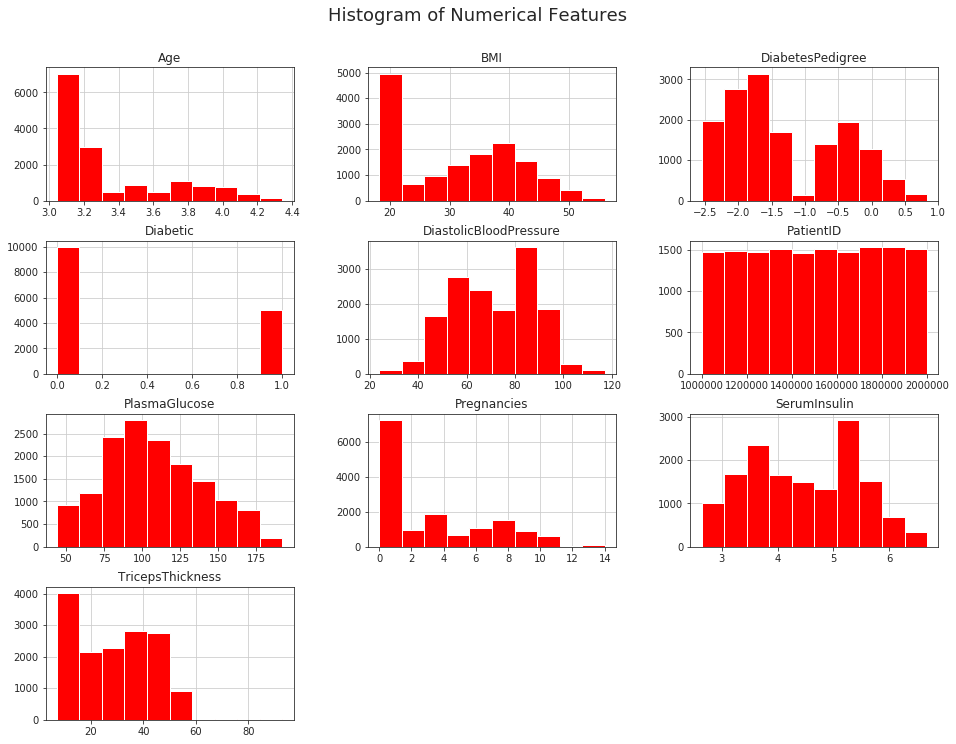

In [22]:
sns.set_style('ticks')
diabetes_df.hist(figsize=(16,12), color='red')
plt.suptitle('Histogram of Numerical Features', fontsize=18, y=0.95)
plt.show()

Ofcourse we can see an improvement in the shape of the above distributions. Even those that are asymmetrical like `Age` and `Pregnancies` do show some improvement.

<h4>Feature-Selection</h4>

Just by eye-balling the dataset, we can see that certain columns hold little or no scientific or statistical importance. A good example is the PatientID column, which is important for indexing or merging data frames, but not important for training a model. Another is the Physician Column. We do not want our model to learn attributes related to physicians, because we do not want the physician data to influence model prediction in the real world. 

In [23]:
# Let's drop the Physician and PatientID columns
diabetes_df.drop(['PatientID','Physician'], axis=1, inplace=True)

# Let's see the data frame
diabetes_df.head()

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0            0            171                      80                34   
1            8             92                      93                47   
2            7            115                      47                52   
3            9            103                      78                25   
4            1             85                      59                27   

   SerumInsulin        BMI  DiabetesPedigree       Age  Diabetic  
0      3.135494  43.509726          0.193254  3.044522         0  
1      3.583519  21.240576         -1.842853  3.135494         0  
2      3.555348  41.511523         -2.538072  3.135494         0  
3      5.717028  29.582192          0.249100  3.761200         1  
4      3.555348  42.604536         -0.598670  3.091042         0

<h4>How balanced is our Data set?</h4>

It is very important to know the class distribution of variables in our data set. Ideally variables should be relatively equally distributed so that one particular class does not overshadow the other class when we train the model.
<br>An imbalanced dataset makes the model to have a high recognition rate (sensitivity) for the dominant class. The F1 score of the model could be unreliable in an imbalanced Data set

<br>For example, if we have 80% of our data in class 0 or non-diabetic and only 20% in class 1 or diabetic, the model we train with this imbalanced data set will learn the attributes of class 0, far more than class 1 and would not generalise properly in real-world or unseen data sets.

Okay let's check the distribution of class observations in our data set

In [24]:
diabetes_df.Diabetic.value_counts()

0    10000
1     5000
Name: Diabetic, dtype: int64

we can see that 10,000 observations are labelled non-diabetics, while 5,000 are diabetic. <br>This is an imbalanced data set. Let's visualize this relationship.

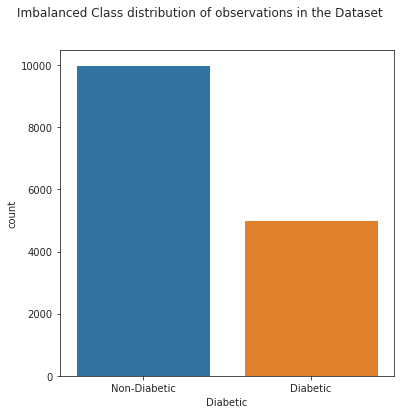

In [25]:
x = diabetes_df.Diabetic.replace(to_replace=[0,1], value=['Non-Diabetic', 'Diabetic'])
plt.figure(figsize=(6, 6))
sns.countplot(x)
plt.suptitle('Imbalanced Class distribution of observations in the Dataset', x=0.45)
plt.show()

<h4>Balance the dataset</h4>

In [26]:
try:
    from imblearn.over_sampling import SMOTE 
except:
    ! pip install imblearn
    from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


We have just imported the SMOTE module from imblearn library. SMOTE stands for _Synthetic Minority Over-sampling Technique_. What it does is to create random synthetic data from the minority class we want to balance, such that we will have equal observations in both classes and the random synthetic data will have the attributes and nuances of the minority class it's created from. 

In [27]:
sm = SMOTE(sampling_strategy='minority', random_state=5, k_neighbors=5)

Now let's pass the features and our target label to the SMOTE instance created above

In [28]:
resampled_features, resampled_target = sm.fit_resample(diabetes_df.iloc[:,:-1], diabetes_df.Diabetic)

Let's see the shapes of our new data set

In [29]:
print('Shape of resampled feature set is:',resampled_features.shape)
print('Shape of resampled target data is:',resampled_target.shape)
type(resampled_features)
type(resampled_target)

Shape of resampled feature set is: (20000, 8)
Shape of resampled target data is: (20000,)


pandas.core.series.Series

We can see that both resampled features and target above have been converted from a pandas object to a numpy data frame. let's convert them back to a Data frame as it will be easier when normalizing feature columns.

In [30]:
resampled_features[:5]

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0            0            171                      80                34   
1            8             92                      93                47   
2            7            115                      47                52   
3            9            103                      78                25   
4            1             85                      59                27   

   SerumInsulin        BMI  DiabetesPedigree       Age  
0      3.135494  43.509726          0.193254  3.044522  
1      3.583519  21.240576         -1.842853  3.135494  
2      3.555348  41.511523         -2.538072  3.135494  
3      5.717028  29.582192          0.249100  3.761200  
4      3.555348  42.604536         -0.598670  3.091042

<h4>Defining our Features and Target Matrices.</h4>

In [31]:
# First let's define our features from the resampled features above
features = pd.DataFrame(resampled_features, columns=diabetes_df.columns[:-1])

# Let's make our target the resampled target above
target = resampled_target 

# Let's see our features and target shape
print('Shape of feature set is:',features.shape)
print('Shape of target data is:',target.shape)

features.head()

Shape of feature set is: (20000, 8)
Shape of target data is: (20000,)


Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0            0            171                      80                34   
1            8             92                      93                47   
2            7            115                      47                52   
3            9            103                      78                25   
4            1             85                      59                27   

   SerumInsulin        BMI  DiabetesPedigree       Age  
0      3.135494  43.509726          0.193254  3.044522  
1      3.583519  21.240576         -1.842853  3.135494  
2      3.555348  41.511523         -2.538072  3.135494  
3      5.717028  29.582192          0.249100  3.761200  
4      3.555348  42.604536         -0.598670  3.091042

Finally let's visualize the new class distribution of observations in our data set

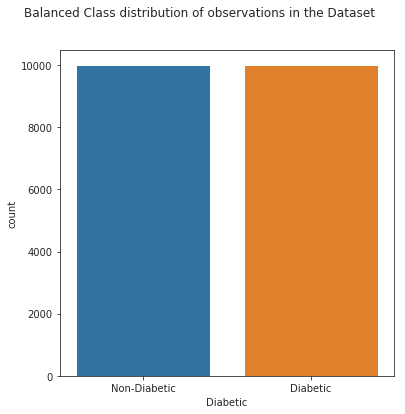

In [32]:
x = pd.Series(target).replace(to_replace=[0,1], value=['Non-Diabetic', 'Diabetic'])
plt.figure(figsize=(6,6))
sns.countplot(x)
plt.suptitle('Balanced Class distribution of observations in the Dataset', x=0.45)
plt.show()

**Multi-collinearity Check:**

Let's inspect the correlation matrix of our features, let's see if we have a multi-collinearity problem amongst our features.
<br>Multi-collinearity occurs when two or more features in our data set have a strong negative (score close to minus one) or positive (score close to one) relationship. Multicolinearity saps the statistical power of the analysis and can cause the coefficients of our model to switch signs, distorting the correct model. It can lead to bias and a wrong F1 score.

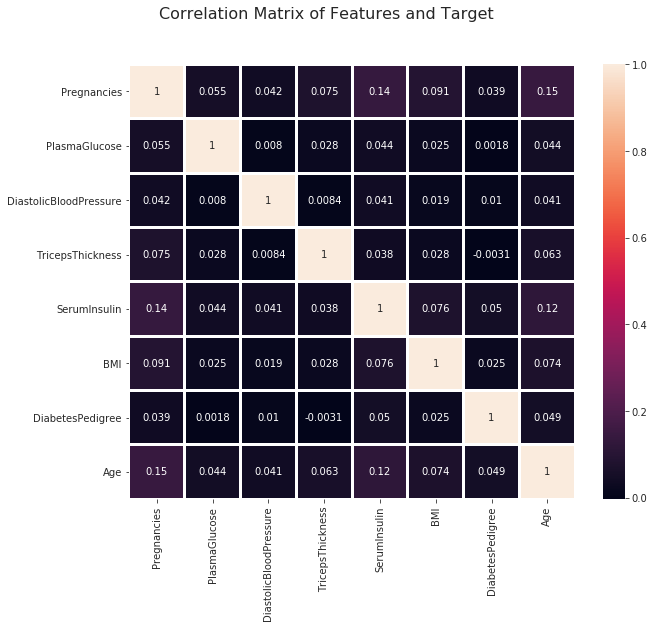

In [33]:
plt.figure(figsize=(10,8))
corr_matrix = features.corr()
sns.heatmap(corr_matrix, annot=True, linewidths=2)
plt.suptitle('Correlation Matrix of Features and Target', fontsize=16, x=0.4)
plt.show()

From the image above,
<br>Lighter colors indicate higher correlation, and darker color indicate weak or no correlation.<br>We can clearly see that all features are unique and independent with corr scores around 0, and thus, we do not have a multi-collinearity problem.

<h4>Normalising the Data</h4>

In Machine learning and Artificial Intelligence in general, it's important to normalise feature values. Normalising puts all the values of the features we use to train our models on the same scale. Between a specific range of values.<br>This is essential so that features with higher values like `PlasmaGlucose,	DiastolicBloodPressure	`, do not dominate other features with lower values and thus skew the model predictions.

Looking at the shapes of the distribution of each feature, those with a roughly normal distribution bell-shape curve, will be normalized using the Zscore method.
While those with varying large and low values will be normalized using the Min-Max method.

1. **Z-Score or Standard Score Normalization:**<br>
Using Z-Score, For each feature value, we subtract the average or mean...
And then divide by the Standard deviation.
This gives a range between minus 3 and 3, but can be more or less

$Xnew = {{Xold - mean} \over STD(sigma)}$
<br>
<br>

2. **Min-Max Method Normalization:**<br>
This method takes each value and subtracts the min and then divides by the range(max - min)...
The resultant values range between zero(0) and one(1)

$Xnew = {{Xold - Xmin} \over Xmax - Xmin}$

Now let's apply these methods to the selected columns using the apply method.

So let's go on and normalise the data set using both Z-score and Min-max normalizers.<br>The rule is If columns are Not `Age`, `Pregnancies` and `TricepsThickness` we apply Z-score, then Min-max otherwise.


In [34]:
# Let's loop through each feature
for col in features.columns:
    # Next let's define statistical moments for each feature
    mean = features[col].mean()
    stdev = features[col].std()
    minimum = features[col].min()
    maximum = features[col].max()

    if col in ['Age', 'Pregnancies','TricepsThickness']:
        # if True, We apply the Min-Max method using apply and lambda
        features[col] = features[col].apply(lambda x: (x - minimum) / (maximum - minimum))
    else:
        # If Not True, we apply Z-score method to the rest
        features[col] = features[col].apply(lambda x: (x - mean) / stdev)


Let's see the normalized features data frame

In [35]:
features.head()

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0     0.000000       1.947455                0.517674          0.313953   
1     0.571429      -0.542725                1.325376          0.465116   
2     0.500000       0.182264               -1.532645          0.523256   
3     0.642857      -0.195991                0.393413          0.209302   
4     0.071429      -0.763374               -0.787074          0.232558   

   SerumInsulin       BMI  DiabetesPedigree       Age  
0     -1.544660  1.200633          1.734444  0.000000  
1     -1.065025 -1.167831         -0.699438  0.070017  
2     -1.095183  0.988112         -1.530475  0.070017  
3      1.219015 -0.280648          1.801199  0.551595  
4     -1.095183  1.104360          0.787809  0.035804

Next let's convert the features and the target to numpy arrays. Using Numpy arrays work best in machine learning

In [36]:
# We shall use the .values method to convert to numpy arrays
features = features.values

# Let's see the first five entries
print(f"Type features: {type(features)}")
print()
print(f'Shape of features: {features.shape}')
features[:5]

Type features: <class 'numpy.ndarray'>

Shape of features: (20000, 8)


array([[ 0.        ,  1.94745453,  0.51767449,  0.31395349, -1.54466028,
         1.20063294,  1.73444374,  0.        ],
       [ 0.57142857, -0.54272522,  1.32537594,  0.46511628, -1.06502486,
        -1.16783085, -0.69943777,  0.07001691],
       [ 0.5       ,  0.18226382, -1.53264456,  0.52325581, -1.09518336,
         0.98811158, -1.53047548,  0.07001691],
       [ 0.64285714, -0.19599133,  0.39341273,  0.20930233,  1.21901506,
        -0.28064765,  1.80119894,  0.55159475],
       [ 0.07142857, -0.76337406, -0.78707399,  0.23255814, -1.09518336,
         1.1043603 ,  0.78780853,  0.03580438]])

In [37]:
print(f'type target is {type(target)}, shape target is {target.shape}.')

type target is <class 'pandas.core.series.Series'>, shape target is (20000,).


In [38]:
# Let's convert target to numpy array

target = target.values
print(f'type target is {type(target)}, shape target is {target.shape}.')

type target is <class 'numpy.ndarray'>, shape target is (20000,).


### **Creating The Classifier Model:**

Using the `Don't Repeat Yourself (DRY)` Paradigm, we shall attempt to create a machine learning Pipeline using `CASH` tools like `LALE` (Language for Automated Learning Explorartion). 
<br>CASH stands for _Combined Algorithm Selection and Hyper-parameters Optimisation technique_

**Splitting The Data:**

First let's split the data in 70% training, 15% validating and 15% Testing sets.

In [39]:
from sklearn.model_selection import train_test_split

We shall use the train_test_split function to divide our data into training, testing and validating sets

In [40]:
x_train, x_val, y_train, y_val = train_test_split(features, target, train_size =0.7, shuffle=True, stratify=target) 

Let's see the shape of the training and validating sets

In [41]:
print(f"Shape of training set is {x_train.shape}, \nShape of validating set is {x_val.shape}")
print(f"Shape of training target is {y_train.shape}, \nShape of validating target is {y_val.shape}")

Shape of training set is (14000, 8), 
Shape of validating set is (6000, 8)
Shape of training target is (14000,), 
Shape of validating target is (6000,)


Now let's further split the validating set into validating and testing sets

In [42]:
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size =0.5, shuffle=True, stratify=y_val) 

Let's see the final shapes of the training, validating and testing sets

In [43]:
print(f"Shape of training set is {x_train.shape}, \nShape of training target is {y_train.shape}")
print(f"Shape of validating set is {x_val.shape}, \nShape of validating target is {y_val.shape}")
print(f"Shape of testing set is {x_test.shape}, \nShape of testing target is {y_test.shape}")

Shape of training set is (14000, 8), 
Shape of training target is (14000,)
Shape of validating set is (3000, 8), 
Shape of validating target is (3000,)
Shape of testing set is (3000, 8), 
Shape of testing target is (3000,)


Let's import our models and build a LALE pipeline to compute the best model using HyperOpt Library

In [44]:
from sklearn.decomposition import PCA
from lale.lib.lale import NoOp
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from xgboost import XGBClassifier as XGBoost
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn.neighbors import KNeighborsClassifier as KNN
from lale.lib.lale import TopKVotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from lale.lib.lale import Hyperopt
lale.wrap_imported_operators()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.weight_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in v

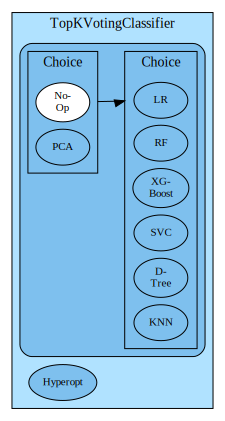

In [45]:
planned_pipeline = (NoOp | PCA) >> (LR | RF | XGBoost | SVC | DTree | KNN)
#ensemble = TopKVotingClassifier(estimator=planned_pipeline)
ensemble = TopKVotingClassifier(
    estimator=planned_pipeline, k=3, optimizer=Hyperopt,
    args_to_optimizer={'max_evals':10, 'scoring':'roc_auc'})
ensemble.visualize()

The above image depicts the smartness of the LALE pipeline object.<br>For each of the six models above, the pipeline decides if it should apply Principal Components Analysis or No Operation, then it optimizes each model and returns the pipeline with the best model. We would then select this ideal model for our classification task.
<br>This process is called semi-automated machile learning. 

In [46]:
try:
    trained_ensemble = ensemble.fit(x_train, y_train)
    print('Trained Successful!')
except Exception as e:
    print(e)

100%|██████████| 1/1 [00:00<00:00,  8.82trial/s, best loss=?]
Error from hyperopt, none of the trials succeeded.


Sadly, LALE keeps failing with error message 'AllTrialsFailed' and this issue has been escalated to the project administrators.
<br>The sweet thing about Machine Learning (ML) is that most ML processes are iterative just like the Explainability concept. Therefore we shall build a simple but effective pipeline using Cross-Validation-Score. Then the best model will be selected and optimized even further using GridSearchCV library.


In [47]:
# Let's import cross-val-score and GridSearchCV from sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Next, we evaluate all six models using Cross_Val_score to find the model with the best average score. 
<br>What cross_val_score does is that it divides the training set into a number of parts. It trains the model on all parts except one, then it uses that part to make a prediction and stores the result somewhere. Then it repeats this process for each of the other parts to ensure every part has been used to train and make predictions. Finally it outputs the mean score for all predictions as score for each model.
<br>So we would use this approach to select the model with the best average score per prediction 

Let's import our models again, since the last time we wrapped them in a LALE wrapper that failed.

In [48]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from xgboost import XGBClassifier as XGBoost
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

Now we apply cross_val_score() function to each model to find the average best model.

In [49]:
for Model in [LR, RF, XGBoost, SVC, DTree, KNN]:
    scores = cross_val_score(Model(), x_train, y_train, cv=7)
    print(Model.__name__, scores.mean().round(2), "+/-", scores.std().round(2))

LogisticRegression 0.78 +/- 0.01
RandomForestClassifier 0.94 +/- 0.01
XGBClassifier 0.96 +/- 0.01
SVC 0.87 +/- 0.01
DecisionTreeClassifier 0.91 +/- 0.01
KNeighborsClassifier 0.86 +/- 0.01


So what we just did above is to apply the cross_val_score() function on each of our six models. on our training sets(x_train, y_train)
<br>From this exercise we can see that the two best models with mean score of 0.95 are `XGBoost` and `RandomForestClassifier`.
<br>Now we shall apply GridSearchCV on these models to fine-tune their hyper-parameters and select the best of the two models.  

In [50]:
depth = [2, 4, 8, 16, 32]
estimators = [10,30, 50, 80, 100]
selected_models = [RF, XGBoost]

# Let's instantiate our RF and XGB models to zero for a start.
rf_model, xgb_model = 0,0

# Then we iterate throgh the loop as we optimize their hyper-parameters
for Model in selected_models:
    grid = GridSearchCV(Model(), cv=7,
                    param_grid = {'max_depth': depth,
                                  'n_estimators': estimators})
    if Model == RF:
        rf_model = grid.fit(x_train, y_train)
        print(Model.__name__, ': Best score = ',rf_model.best_score_)
        print(f"Type rf_model is {type(rf_model)}")
    else:
        xgb_model = grid.fit(x_train, y_train)
        print(Model.__name__, ': Best score = ',xgb_model.best_score_)
        print(f"Type xgb_model is {type(xgb_model)}")

RandomForestClassifier : Best score =  0.9438571428571427
Type rf_model is <class 'sklearn.model_selection._search.GridSearchCV'>
XGBClassifier : Best score =  0.9617857142857142
Type xgb_model is <class 'sklearn.model_selection._search.GridSearchCV'>


We can see from the above messages that after applying GridSearchCV to both models, the `XGBoost` model has the best score overall.
<br>So we shall use this model to predict on the validation set. and test for accuracy, F1_score and roc_auc scores.

In [51]:
# let's just see the best parameters of our winning model.
xgb_model.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [52]:
# in addition to the best parms above, let's see the best estimators of our xgb_model
xgb_model.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

Now, Let's make a prediction on the validation data.

In [53]:
pred = xgb_model.predict(x_val)

Let's define an evaluation method that takes a true label and a prediction and outputs a dictionary of the metrics we care most about.

In [54]:
def eval_method(ytrue, ypred):
    """This method takes a true label and 
    a prediction of the true label and returns
    a dictionary of accuracy, F1 and roc_auc
    scores of our model predictions.
    """
    # Let's create a dictionary
    eval_dict = {'Accuracy':0, 'F1_Score':0, 'Roc_Auc':0}

    # Let's evaluate 
    eval_dict['Accuracy'] = accuracy_score(ytrue, ypred).round(2)
    eval_dict['F1_Score'] = f1_score(ytrue, ypred, average='weighted').round(2)
    eval_dict['Roc_Auc'] = roc_auc_score(ytrue, ypred).round(2)

    return eval_dict


Let's see the performance metrics of our model on the validation set.

In [55]:
eval_method(y_val, pred)

{'Accuracy': 0.97, 'F1_Score': 0.97, 'Roc_Auc': 0.97}

<b><h3>Understanding the Model Prediction</h3></b>

Our model has performed impressively on all the metrics above for the validation dataset. This is great.<br>For a better understanding of the predictions and metrics of our model, let's plot the confusion matrix chart.

<h4>Let's define a function for plotting and visualizing The Confusion matrix</h4>First let's import the confusion matrix metric from sklearn. 

In [56]:
from sklearn.metrics import confusion_matrix
import itertools

Next let's define a method that plots the confusion matrix object we will instantiate soon.

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Next, let's instantiate the confusion matrix object and plot it with the data from the predictions \ evaluations from our model

Confusion matrix, without normalization
[[1461   39]
 [  50 1450]]


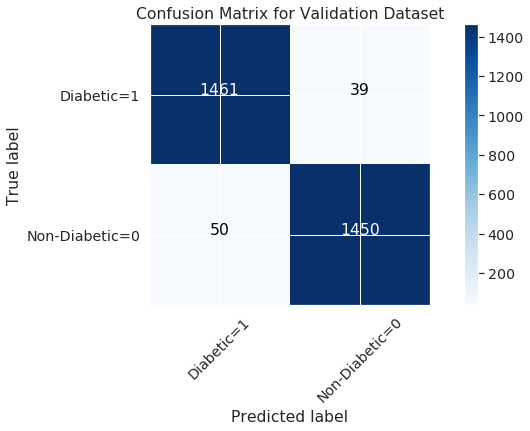

In [58]:
# Instantiating the confusion matrix object
xgb_confusion_matrix = confusion_matrix(y_val, pred, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.3)
plot_confusion_matrix(xgb_confusion_matrix, 
                        classes=['Diabetic=1','Non-Diabetic=0'],
                        normalize= False,  
                        title='Confusion Matrix for Validation Dataset')

In [59]:
eval_method(y_val, pred)

{'Accuracy': 0.97, 'F1_Score': 0.97, 'Roc_Auc': 0.97}

### **Understanding The Confusion Matrix:**

The Confusion Matrix is typically used for binary classification problems but can be used for multi-label classification problems by simply binarizing the output. It gives a more thorugh suite of metrics to evaluate a Classification model. This is because accuracy alone is often inadequate in evaluating a classification task. The Confusion Matrix makes it possible to compute those metrics we care about,  such as _Accuracy_, _F1_score_, _Recall_, _Precision_, _ROC_, _AUC_ and more.

**Let’s inspect the cells of The Confusion-Matrix above:**
1. _True Positive (TP):_ This is the cell in position [0,0], it's the first blue cell in the Matrix above.<br>True Positive contains the number of positive cases **properly** classified as positive. In other words, the number of Diabetic patients properly classified as Diabetic.
<br>
<br>
2. _False Positive (FP):_ This is the cell in position [0,1], it's the white cell to the right, beside _TP_,in the Matrix above.<br>False Positive contains the number of negative cases **improperly** classified as positive. In other words, the number of Non-Diabetic patients improperly classified as Diabetic.
<br>
<br>
3. _True Negative (TN):_ This is the cell in position [1,1], it's the second blue cell situated directly beneath _FP_ above.<br>True Negative contains the number of negative cases **properly** classified as negative. In other words, the number of Non-Diabetic patients properly classified as Non-Diabetic.
<br>
<br>
4. _False Negative (FN):_ This is the cell in position [1,0], it's the white cell to the left, beside _TN_,in the Matrix above.<br>False Negative contains the number of positive cases **improperly** classified as negative. In other words, the number of Diabetic patients improperly classified as Non-Diabetic.

From the Confusion Matrix, we can easily compute any of the classification metrics we care about.
<br>Let's calculate the accuracy, F1_score and Roc_Auc scores using the confusion matric above 

In [60]:
# First we define our variables
TP = xgb_confusion_matrix[0][0]
FP = xgb_confusion_matrix[0][1]
TN = xgb_confusion_matrix[1][1]
FN = xgb_confusion_matrix[1][0]

print(f"TP is {TP}\nFP is {FP}\nTN is {TN}\nFN is {FN}")

TP is 1461
FP is 39
TN is 1450
FN is 50


<b><h4>Accuracy:</h4></b>
Accuracy is simply the fraction of cases correctly classified.<br>Accuracy:-  ${{(TP + TN)} \over {TP + TN + FP + FN}} * 100$

In [61]:
accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100

# Let's print the accuracy score, which is what we saw from accuracy_score() func above
print(accuracy.round())

97.0


<b><h4>F1_Score:</h4></b>
F1_Score is the weighted harmonic mean of Precision and Recall.<br>F1_Score:-  $2 * {{Precision * Recall} \over {Precision + Recall}}$

To Compute the F1_score, we need to first compute _Precision_ and _Recall_ scores.

**Precision:** Is the fraction of positive cases correctly classified as positive, from the total number of cases identified as positive by the model.

**Recall:** Is the fraction of positive cases correctly classified as positive, from the total number of real positive cases in the data.

In [62]:
# First, let's compute Precision and Recall
Precision = (TP) / (TP + FP)
Recall = (TP) / (TP + FN)

print(f'Precision is {Precision.round(4)},\nRecall is {Recall.round(4)}')

Precision is 0.974,
Recall is 0.9669


In [63]:
# Next, let's compute F1_Score
F1_Score = 2 * ((Precision * Recall) / (Precision + Recall))
print(f"F1_Score is {F1_Score.round(2)}")

F1_Score is 0.97


The F1_Score is a far better metric than mere Accuracy, as it tells us how sensitive our model is to the Diabetic class, as well as it's general performance in classifying cases that are Diabetic.<br>This metric is very important if we want to build a classifier that can be used to effectively classify Diabetic or Non-Diabetic patients. And from this exercise so far, our model is 96% correct on F1_Score.

<b><h4>AUC_Score:</h4></b>

AUC_Score simply shows the Trade-off between the _True Positive Rate (TPR)_ and the _False Positive rate (FPR)_. The AUC_Score is calculated from the _ROC (Receiver Operator Characteristics) curve_. The _ROC curve_ simply plots all values of the TPR and the FPR and displays a curve. The closer it is to the position 1,1 on the x and y axis, the better the model and the higher the AUC score, with a max score of 1 or 100%. 

**_TPR_** shows what fraction of positive cases was correctly classified as positive from total number of positive real cases in the data.<br>**_FPR_** shows what fraction of negative cases was incorrectly classified as positive from the total number of real negative cases in the data set.

In [64]:
TPR = Recall  # The TPR is calculated exactly like the Recall
FPR = FP / (TN + FP) 
print(f"TPR is {TPR}\nFPR is {FPR}")

TPR is 0.9669093315684977
FPR is 0.026192075218267292


Let's define a simple function that plots the ROC_curve and displays the AUC_score.

In [65]:
def plot_roc_curve(model, x_test, y_test, pred):
     # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    plt.figure(figsize=(8,6))
    plt.title('Receiver Operating Characteristic Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return None

Let's call the plot_roc_curve method defined above on the XGBoost classifier with the predictions on the validation data

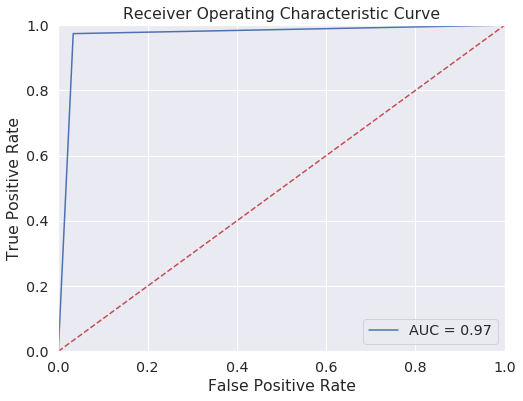

In [66]:
plot_roc_curve(xgb_model, x_val, y_val, pred)

Just like F1_score, AUC_Score is extremely important in evaluating the performance of our model. It clearly shows what percent of positve cases the model identified correctly as well as the percent of negative cases it may have misclassified as positive.

### **Making Predictions on Testing Data**

It's time to evaluate our model performance on the never-before-seen Test set. In Machine Learning generally, if we train our model with more relevant data, all other things being equal, such a model would generalise better to future unseen data.
<br>So let's add the validation data to the training data, and retrain our model on the combined data set and then we can make predictions on the testing data.

In [67]:
# before adding the training and validation data sets together, let's see their types again to be certain
print(f'Type of x_train is {type(x_train)}\nType of y_train is {type(y_train)}\nType of x_val is {type(x_val)}\nType of y_val is {type(y_val)}')

Type of x_train is <class 'numpy.ndarray'>
Type of y_train is <class 'numpy.ndarray'>
Type of x_val is <class 'numpy.ndarray'>
Type of y_val is <class 'numpy.ndarray'>


They're all numpy array objects, so we would use the vstack numpy method to stack x_val underneath X_train and y_val underneath y_train.
<br>Let's once again print out the current shapes of these arrays before stacking them

In [68]:
print(f"Shape of x_train is {x_train.shape}, \nShape of y_train is {y_train.shape}")
print(f"Shape of x_val is {x_val.shape}, \nShape of y_val is {y_val.shape}")

Shape of x_train is (14000, 8), 
Shape of y_train is (14000,)
Shape of x_val is (3000, 8), 
Shape of y_val is (3000,)


Let's vstack the training sets x_train and x_val

In [69]:
x_train2 = np.vstack((x_train, x_val))

# Let's print out the new shape of our training set
print(f"Shape of x_train2 is {x_train2.shape}")

Shape of x_train2 is (17000, 8)


For the y_train and y_val arrays, we need to convert them from Rank 1 arrays of shape in the form of (17000,) to proper arrays with shape in form of (17000, 1) using the np.newaxis method, before we can vstack them. Then after vstacking them we flatten it back to Rank 1 array for modelling.

In [70]:
y_train2 = y_train[:, np.newaxis]
y_val2 = y_val[: , np.newaxis]

# Let's see the new shape
print(f'y_train2 shape is {y_train2.shape}, y_val2 shape is {y_val2.shape}')

y_train2 shape is (14000, 1), y_val2 shape is (3000, 1)


Now we can vstack both arrays

In [71]:
y_train2 = np.vstack((y_train2, y_val2))

# Let's print out the new shape of our training label set
print(f"Shape of y_train2 is {y_train2.shape}")

Shape of y_train2 is (17000, 1)


Finally, we flatten y_train2 back to a Rank 1D array for modelling

In [72]:
y_train2 = y_train2.flatten()

# Let's see the shape
print(f"Shape of y_train2 is {y_train2.shape}")

Shape of y_train2 is (17000,)


Now, let's train our XGBoost Classifier model with the x_train2 and y_train2 data sets

In [73]:
xgb_model.fit(x_train2, y_train2)
print('Training completed')

Training completed


Now let's make a prediction on the test data set

In [74]:
pred = xgb_model.predict(x_test)

Let's evaluate the model predictions on test data

In [75]:
eval_method(y_test, pred)

{'Accuracy': 0.96, 'F1_Score': 0.96, 'Roc_Auc': 0.96}

Let's visualize the Confusion Matrix and ROC_curve of the model latest performance on the test data. 

Confusion matrix, without normalization
[[1454   46]
 [  69 1431]]


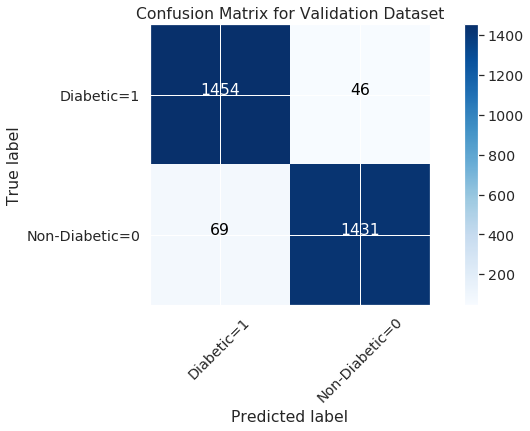

In [76]:
# Instantiating the confusion matrix object
xgb_confusion_matrix2 = confusion_matrix(y_test, pred, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.3)
plot_confusion_matrix(xgb_confusion_matrix2, 
                        classes=['Diabetic=1','Non-Diabetic=0'],
                        normalize= False,  
                        title='Confusion Matrix for Validation Dataset')

Let's plot the ROC_curve 

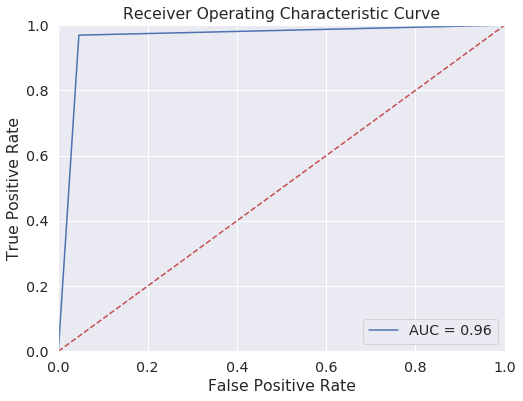

In [77]:
plot_roc_curve(xgb_model, x_test, y_test, pred)

## **Explainability**

Explainability is the effect of communication of processes and decisions made by Data Scientists, pertaining to their data, models and predictions and how they're applicable to the problem being solved.<br>We shall look at _Model_ and _Predictive_ Explainability

### <b>Statistical Inference or Model Explainability</b>
Model Explainability is focused on model behaviour such as how the model interprets features, computes intermediate values and so on.

Based on _Model Explainability_ we have seen the performance of our model, we have built a solid model that can classify patients as either Diabetic or Non-Diabetic using common customer data as represented in the data set. Our model has done well on Statistical moments like _F1_Score_, _AUC_Score_, _Accuracy_, _Recall_, _Precision_ and so on.
<br>But we must remember our objective is not just to build another amazing model. But to help Medical Practitioners to quickly detect the onset or progress of Diabetes in patients. So that patients can quickly tackle this adverse underlying condition of Diabetes, in order to stop or reduce the fatality rate of COVID19. We need to move beyond _Model Explainability_ to _Predictive Explainability_.

### <b>Predictive Explainability</b>
Predictive Explainability is focused on the outputs of the model, for example, why is the image of a dog, classified as a cat or even as a dog?


Predictive Explainability goes beyond model performance metric scores. It answers such questions as:-
1. what features in the data set was the model paying most attention to when it made its predictions. 
2. Why did the model classify one patient as Diabetic and another similar patient as Non-Diabetic
3. If we randomized the features or changed the values of one feature slightly, how impactful will such a tiny change affect the predictions of the model.
4. Such and more similar questions.

Note that to make our models more acceptable in the real world we must make them entirely explainable.

<b><h4>Explainability by Permutation Importance:</h4></b>

One of the most basic questions we might ask of a model is: What features have the biggest impact on predictions? <br>_Permutation importance (PI)_ answers this question by randomly shuffling a single column of the validation data, leaving the target and all other columns in place, and measuring how that affects accuracy of predictions. _PI_ does this on each feature and measures the effect on accuracy score for each randomly shuffled feature.
<br>Permutation importance is useful useful for debugging, understanding a model, and communicating a high-level overview from our model.


Let's apply Permutaion importance to see which features have most impact on our model

In [78]:
# First import a few libraries
try:
    import eli5
    from eli5.sklearn import PermutationImportance
except:
    ! pip install eli5
    import eli5
    from eli5.sklearn import PermutationImportance

In [79]:
from eli5 import show_prediction

In [80]:
# Next, let's instantiate the PemuatationImportance object
perm = PermutationImportance(xgb_model, random_state=1).fit(x_test, y_test)
class_names_ = list(diabetes_df.columns[:-1])

# Let's show the weights of features in the data set
eli5.show_weights(perm, feature_names = class_names_)

**Interpreting Permutation Results:**

Randomly re-ordering a single column should cause less accurate predictions, since the resulting data no longer corresponds to anything observed in the real world. Model accuracy especially suffers if we shuffle a column that the model relied on heavily for predictions.
<br>The values towards the top are the most important features, and those towards the bottom matter least. The first number in each row shows how much model performance decreased with a random shuffling (in this case, using "accuracy" as the performance metric).

Therefore it can be inferred that the top four features that affect our xgb_model performance and predictions are:-
>>Pregnancies<br>
Age<br>
BMI<br>
SerumInsulin

These are the top 4 features that our model is most sensitive to. 

<b>USE Case:</h4></b><br>
The use case of Permutation importance to this project is that it quickly gives the Medical Practitioners insight to the most important features that our Statistical model pays attention to, when it makes its predictions.
<br>Most Doctors may agree that a womans' `Pregnancy history`, `Age` and `Body Mass Index (BMI)` contribute the most to whether she becomes Diabetic or Not.

The following article from [healthline.com](https://www.healthline.com/health/diabetes/symptoms-in-women#treatment) corroborates Pregnancy and Diabetes

<b><h4>Explainability by AIX360:</h4></b>

We shall use the LIME technique from aix360 library to show in depth Predictive Explainability.

LIME ( Local Interpretable Model-agnostic Explanations )is a novel explanation technique that explains the prediction of any classifier in an interpretable and faithful manner by learning an interpretable model locally around the prediction.

In [81]:
from aix360.algorithms.lime import LimeTabularExplainer

Let's instantiate a LimeTabularExplainer object for our data

In [82]:
explainer = LimeTabularExplainer(training_data = x_test, 
                                 training_labels = y_test, 
                                 mode = 'classification',
                                 feature_names = class_names_,
                                 verbose = False,
                                 class_names = ['Non-Diabetic', 'Diabetic'],
                                 feature_selection = 'highest_weights')

### **LIME Use Case:**
Medical Practitioners who are trying to get insight as to why the model predicted a patient as diabetic or non diabetic. Based on each individual probability scores, a Medical Practitioner can point a patient to specific features that have contributed to the patients diagnosis.

A Medical Practitioner can get insights to the following questions using LIME and be better informed to handle patients queries and fears.:

A. What features contribute the most to each of the classes?<br>
Using these insights we can dig deep into our model to truly explain our predictions.<br>
B. Where is information gained the most?<br>
C. What is the cost associated with a false positive?<br>
D. What is the cost associated with a false negative?<br>

Let's define a simple function that outputs a list of radom index of both classes of observations from our data set. We can pass any positive integer and a true label to the method. 

In [83]:
def random_idx(limit, y_test):
    """This method takes limit a positive integer and generates equal classes
    Of random index to plot the explainability graphs. It returns a list of
    evenly classed random index.
    Note that if an odd number is given, the method by default adds 
    1 to make it even
    """

    if limit % 2 != 0:
        limit +=1
        
    diabetic = []
    non_diabetic = []
    while True:
        if (len(diabetic) == len(non_diabetic)) & (len(diabetic) == limit//2):
            break

        idx = np.random.randint(0, len(y_test)-1)

        if y_test[idx] == 1:
            if len(diabetic) == limit//2:
                continue
            else:
                diabetic.append(idx)
        else:
            if len(non_diabetic) == limit//2:
                continue
            else:
                non_diabetic.append(idx)

    return diabetic + non_diabetic
    


Next let's call the method random_idx method

In [99]:
np.random.seed(5)  # So that we can reproduce the same random values. Comment this line out to try other random PatientsID
rands = random_idx(4, y_test)
print(rands)

[2915, 1424, 2254, 1725]


Next let's define a method that will display the insights of the model prediction for each of the four random patients index above.

In [85]:
def show_explainability_chart(random_numbers):
    """ This method takes a list of random index and plots the 
    explainability chart using the XGBoost model on test or val sets
    """
    for i in rands:
        idx = i
        print(f'predicted class = {xgb_model.predict(x_test[[idx]])}')
        print(f'True class = {y_test[[idx]]}')
        print(f'random id: {idx}')
        
        explanation = explainer.explain_instance(x_test[idx],
                                            xgb_model.predict_proba,
                                            num_features = 5,
                                            num_samples = len(x_test))
        
        explanation.show_in_notebook()
        print()
    return None

Next let's call the show_explainability_chart() method on the four predictions 

In [86]:
sns.set_style('whitegrid')
show_explainability_chart(rands)

predicted class = [1]
True class = [1]
random id: 2915



predicted class = [1]
True class = [1]
random id: 1424



predicted class = [1]
True class = [0]
random id: 2254



predicted class = [0]
True class = [0]
random id: 1725


<b><h3>Explainability Use Cases: Medical Practitioner</h3></b>

Explainability makes it easy for the Medical Practitioner to see personalised details for each patient, based on the Models Prediction.<br>
We shall treat the four random cases above as four Patients with Patient IDs: [940, 1301, 1840, 650]. Remember that we chose 5 num_features from the explain_instance() function.<br>Therefore we shall have 5 features of most importance to the prediction per Patient.

**Patient ID: 2915**

For this patient, the True and Predicted classes are [1] or Diabetic. Also, The top 5 features that contributed to the model classifying this customer are:
1. BMI
2. Pregnancies
3. DiastolicBloodPressure
4. Age
5. SerumInsulin

The model was able to classify this Patient as Diabetic based on the patients scores as shown in the feature/value section of the Patients'chart.<br>
These scores are weighted on the range of acceptable weights per feature as seen in the Non-Diabetic/Diabetic section above.<br>Classification is based on the conditional probability of the Patients score per feature given total scores per feature.<br>
Therefore a Medical Practitioner can give detailed insights to this Patient and point them to the features that are abnormal and the applicable treatment for the top five features listed here. 

Let's look at the last Patient from these examples...

**Patient ID: 1725**

For this patient, the True and Predicted classes are [0] or Non-Diabetic. Also, The top 5 features that contributed to the model classifying this Patient are:
1. SerumInsulin
2. Pregnancies
3. DiastolicBloodPressure
4. TricepsThickness
5. PlasmaGlucose

The model was able to classify this Patient as Non-Diabetic based on the patients scores as shown in the feature/value section of the Patients'chart.<br>
These scores are weighted on the range of acceptable weights per feature as seen in the Non-Diabetic/Diabetic section above.<br>Classification is based on the conditional probability of the Patients score per feature given total scores per feature.<br>
It is interesting to see that although this Patient is classified as Non-Diabetic, The Patients Pregnancy status and TricepsThickness indicate Diabetic conditions, even though on all other features, the Patient is within the Non-Diabetic range.
<br>Therefore a Medical Practitioner can give detailed insights to this Patient and point them to the features that may be abnormal and the applicable measures they should apply going on.<br>For example, weight loss via diet and exercise can help this Patient reduce TricepsThickness.

_Finally, the small float numbers beside each horizontal feature bar indicate the relative weight of each feature in the prediction_

<b><h3>Explainability Evaluation Metrics</h3></b>

<b><h4>1. Faithfulness Metric:</h4></b> 
This metric evaluates the correlation between the importance assigned by the interpretability algorithm
    to attributes and the effect of each of the attributes on the performance of the predictive model.
    The higher the importance, the higher should be the effect, and vice versa, The metric evaluates this by
    incrementally removing each of the attributes deemed important by the interpretability metric, and
    evaluating the effect on the performance, and then calculating the correlation between the weights (importance)
    of the attributes and corresponding model performance.The Faithfulness scores go from -1 to 1, since it measures correlation.
    
 It's basically the correlation between the locally perturbed model by the LIME explainer and the actual model, with the value between -1 and 1. It indicates if the Local Explained model is faithful to the original model.
 
 
<b><h4>2. Monotonicity Metric:</h4></b>
This metric measures the effect of individual features on model performance by evaluating the effect on
    model performance of incrementally adding each attribute in order of increasing importance. As each feature
    is added, the performance of the model should correspondingly increase, thereby resulting in monotonically
    increasing model performance

This is the idea that each added feature increases the ability of the model to discriminate classes.
    
    
Let's apply these metrics to explainability

In [87]:
from aix360.metrics import faithfulness_metric, monotonicity_metric

We shall use the index of the first PatientID we saw above for computing the metrics

In [88]:
id = rands[0]
print(id)

2915


Now, let's create an explain.instance object for the patient prediction (id) using the LimeTabularExplainer object we instantiated earlier.

In [89]:
explanation = explainer.explain_instance(x_test[id],
                                            xgb_model.predict_proba,
                                            num_features = 5,
                                            num_samples = len(x_test))
        

Let's predict the class of the instance.

In [90]:
predicted_class = xgb_model.predict(x_test[id].reshape(1,-1))[0]
predicted_class

1

In [91]:
# Let's see the explanation
explanation.show_in_notebook()

Let's get the local explanation for the prediction

In [92]:
local_exp = explanation.local_exp[predicted_class]

In [93]:
# Let's convert it to a dictionary object to be used in the metrics
mapped = explanation.as_map()

print(type(mapped))

<class 'dict'>


Let's define the coefficients and the base, which are basicly numpy array in the shape of the predicted patient data initialised with zeros

In [94]:
# first we save the Patient Data from the testing dat set in variable x
x = x_test[id]

# Then we create an array of zeros for the coefficient and the base of this Patient
coefs = np.zeros(x.shape[0])
base = np.zeros(x.shape[0])

Now let's update the values of the coefficients from the local explanation object

In [95]:
for value in local_exp:
    coefs[value[0]] =  value[1]

# Let's see the updated coeefficients
print(coefs)

[0.17 0.09 0.   0.   0.07 0.21 0.   0.08]


Finally, let's compute both Faithfulness and Monotonicity metrics

In [96]:
faithfulness_score = faithfulness_metric(xgb_model, x, coefs, base)

monotonicity_score = monotonicity_metric(xgb_model, x, coefs, base)

print('Faithfulness:', faithfulness_score)
print('Monotonicity:', monotonicity_score)

Faithfulness: 0.4954894598869911
Monotonicity: False


Faithfulness score is about 50% which is quite a solid indication of positive correlation between the explainer model and our xbg_model.<br>
Monotonicity is false, and simply indicates that each added feature does not translate to an increase in the model's ability to classify Patients correctly.

<b><h3>Summary:</h3></b>

We have built a model to predict the onset of Diabetes, using metrics like Accuracy, F1_score and AUC_score to measure its effectiveness.
We have also applied explainability tools like Permutation Importance and aix360 to show what features are most important to the model and to create deep insights to any Medical Practitioner who decides to apply this project and the trained model in detecting Diabetes in the population. So that those who are Diabetic can immediately commence proper maintenance habits to reduce the adverse effect and to make them less susceptible to adverse effects of COVID19.

The final steps include:
1. Training the model with all the training, validating and testing sets.
2. Saving the trained model for deployment.

In [102]:
print(f'x_train2 shape is: {x_train2.shape}, y_train2 shape is {y_train2.shape}')
print(f'x_test shape is: {x_test.shape}, y_test shape is {y_test.shape}')

x_train2 shape is: (17000, 8), y_train2 shape is (17000,)
x_test shape is: (3000, 8), y_test shape is (3000,)


Let's vstack x_train with x_test and y_train with y_test

In [103]:
x_train_final = np.vstack((x_train2, x_test))
print(x_train_final.shape)

(20000, 8)


In [104]:
y_train2 = y_train2[:, np.newaxis]
y_test = y_test[:, np.newaxis]
print(f'y_train2 shape is: {y_train2.shape}, y_test shape is {y_test.shape}')

y_train2 shape is: (17000, 1), y_test shape is (3000, 1)


In [106]:
y_train_final = np.vstack((y_train2, y_test))
y_train_final = y_train_final.flatten()
print(y_test_final.shape)

(20000,)


Now Let's train the model with all the data

In [107]:
xgb_model.fit(x_train_final, y_train_final)
print('Training Completed!')

Training Completed!


In [108]:
print(xgb_model.best_params_)

{'max_depth': 8, 'n_estimators': 100}


In [111]:
print(xgb_model.best_estimator_)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


<b><h3>Saving the Model:</h3></b>

Pickle is the standard way of serializing objects in Python.
We shall use the pickle operation to serialize our machine learning model and save the serialized format to a file.

In [112]:
try:
    import pickle
except:
    ! pip install pickle
    import pickle

In [114]:
# save the model to disk
filename = 'xgb_diabetes_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

In [118]:
# some time later if we want to load the model, we can do...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))